In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector

# Loading the Sales dataset
sales = pd.read_csv("D:/Sales.csv", encoding='latin1')
print(sales.head())

   Order Number  Line Item Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1   1/1/2016           NaN       265598        10   
1        366001          1   1/1/2016     1/13/2016      1269051         0   
2        366001          2   1/1/2016     1/13/2016      1269051         0   
3        366002          1   1/1/2016     1/12/2016       266019         0   
4        366002          2   1/1/2016     1/12/2016       266019         0   

   ProductKey  Quantity Currency Code  
0        1304         1           CAD  
1        1048         2           USD  
2        2007         1           USD  
3        1106         7           CAD  
4         373         1           CAD  


In [2]:
sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [3]:
# Data Information
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [4]:
# Data Cleaning
# Convert 'Order Date' and 'Delivery Date' to datetime, handling errors and missing values
sales['Order Date'] = pd.to_datetime(sales['Order Date'], errors='coerce')
sales['Delivery Date'] = pd.to_datetime(sales['Delivery Date'], errors='coerce')
# Rename columns to remove whitespace
sales = sales.rename(columns={
    'Order Number': 'OrderNumber',
    'Order Date': 'OrderDate',
    'Line Item':'LineItem ',
    'Delivery Date': 'DeliveryDate',
    'Currency Code': 'CurrencyCode'
})
sales.columns = sales.columns.str.strip()
# Checking for missing values
print("Missing values in Sales:\n", sales.isnull().sum())

Missing values in Sales:
 OrderNumber         0
LineItem            0
OrderDate           0
DeliveryDate    49719
CustomerKey         0
StoreKey            0
ProductKey          0
Quantity            0
CurrencyCode        0
dtype: int64


In [5]:
#Handle missing Delivery Dates
sales = sales.dropna(subset=['DeliveryDate']) 

#Removing duplicate values
sales = sales.drop_duplicates(subset='OrderNumber')

# Checking for missing values again after handling
print("Missing values in Sales after handling:\n", sales.isnull().sum())

Missing values in Sales after handling:
 OrderNumber     0
LineItem        0
OrderDate       0
DeliveryDate    0
CustomerKey     0
StoreKey        0
ProductKey      0
Quantity        0
CurrencyCode    0
dtype: int64


In [6]:
sales.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5580 entries, 1 to 62881
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderNumber   5580 non-null   int64         
 1   LineItem      5580 non-null   int64         
 2   OrderDate     5580 non-null   datetime64[ns]
 3   DeliveryDate  5580 non-null   datetime64[ns]
 4   CustomerKey   5580 non-null   int64         
 5   StoreKey      5580 non-null   int64         
 6   ProductKey    5580 non-null   int64         
 7   Quantity      5580 non-null   int64         
 8   CurrencyCode  5580 non-null   object        
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 435.9+ KB


Sales Dataset Summary:
         OrderNumber  LineItem                      OrderDate  \
count  5.580000e+03    5580.0                           5580   
mean   1.478037e+06       1.0  2019-01-17 00:31:13.548387072   
min    3.660010e+05       1.0            2016-01-01 00:00:00   
25%    1.229506e+06       1.0            2018-05-13 12:00:00   
50%    1.527014e+06       1.0            2019-03-07 00:00:00   
75%    1.809058e+06       1.0            2019-12-14 00:00:00   
max    2.243032e+06       1.0            2021-02-20 00:00:00   
std    4.352701e+05       0.0                            NaN   

                        DeliveryDate   CustomerKey  StoreKey   ProductKey  \
count                           5580  5.580000e+03    5580.0  5580.000000   
mean   2019-01-21 13:06:50.322580480  1.178197e+06       0.0  1134.073477   
min              2016-01-06 00:00:00  3.010000e+02       0.0     1.000000   
25%              2018-05-18 00:00:00  6.461295e+05       0.0   439.000000   
50%           

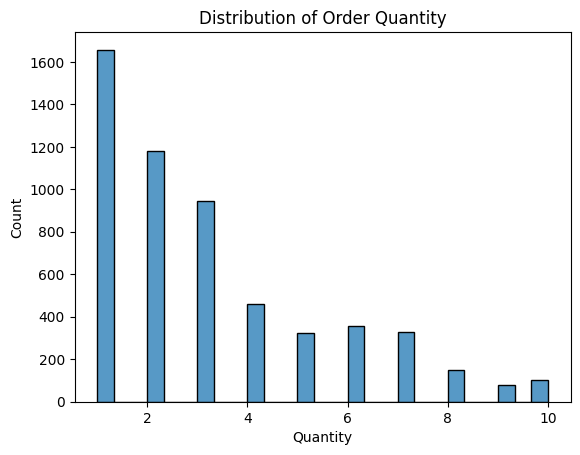

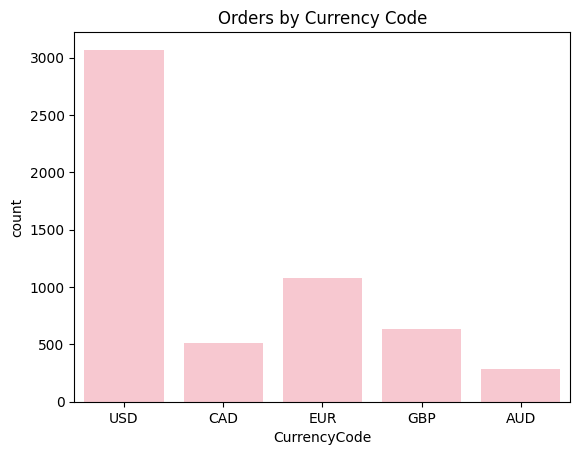

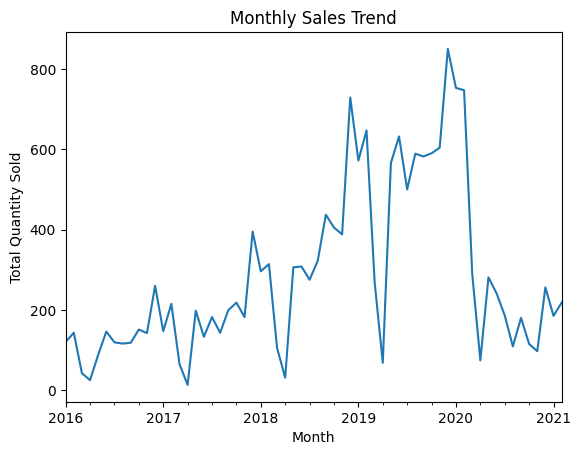

In [7]:
# Exploratory Data Analysis (EDA)
print("Sales Dataset Summary:\n", sales.describe())

# Distribution of Order Quantity
plt.figure()
sns.histplot(sales['Quantity'])
plt.title('Distribution of Order Quantity')
plt.show()

# Orders by CurrencyCode
plt.figure()
sns.countplot(data=sales, x='CurrencyCode', color='pink')
plt.title('Orders by Currency Code')
plt.show()

# Monthly Sales Trend
sales['OrderMonth'] = sales['OrderDate'].dt.to_period('M')
monthly_sales = sales.groupby('OrderMonth')['Quantity'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend', xlabel='Month', ylabel='Total Quantity Sold')
plt.show()

In [8]:
# Convert each row of the DataFrame to a tuple for SQL insertion
 #Selecting only relevant columns for insertion
rows_to_insert = [tuple(row) for row in sales[['OrderNumber', 'LineItem', 'OrderDate', 'DeliveryDate', 'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'CurrencyCode']].values]

# Connecting to MySQL database
db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="3008",
    database="global_electronics"
)

cursor = db_connection.cursor()

# Create table if it doesn't exist
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Sales (
        OrderNumber INT PRIMARY KEY,
        LineItem INT,
        OrderDate DATE,
        DeliveryDate DATE,
        CustomerKey INT,
        StoreKey INT,
        ProductKey INT,
        Quantity INT,
        CurrencyCode VARCHAR(10)
    );
''')

# Insert data in batches
batch_size = 500  
for start in range(0, len(rows_to_insert), batch_size):
    batch = rows_to_insert[start:start + batch_size]
    
    try:
        cursor.executemany('''
            INSERT IGNORE INTO Sales (OrderNumber, LineItem, OrderDate, DeliveryDate, CustomerKey, StoreKey, ProductKey, Quantity, CurrencyCode)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
        ''', batch)
        db_connection.commit()
    except mysql.connector.Error as err:
        print(f"Error in batch {start // batch_size + 1}: {err}")
        db_connection.rollback()

# Confirm successful insertions by counting rows in the table
cursor.execute("SELECT COUNT(*) FROM Sales")
row_count = cursor.fetchone()[0]
print(f"Total sales records inserted: {row_count}")

# Close the cursor and database connection
cursor.close()
db_connection.close()


Total sales records inserted: 5580
